# NAMA KELOMPOK :


    1. AHMAD IRVAN MAULANA / 33421003
    
    2. DIMAS RACHMAN MAULANA / 33421009

__Menambahkan Library untuk Data Manipulation dan Data Visualization__

In [9]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import zipfile
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# __Load Dataset__

In [10]:
!pip install kaggle



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!kaggle datasets download -d kamyababedi/gold-prices

gold-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
df = pd.read_csv('GCF.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,268.399994,268.399994,268.399994,268.399994,268.399994,0.0
1,2001-01-03,268.000000,268.000000,268.000000,268.000000,268.000000,1.0
2,2001-01-04,267.299988,267.299988,267.299988,267.299988,267.299988,1.0
3,2001-01-05,268.000000,268.000000,268.000000,268.000000,268.000000,0.0
4,2001-01-08,268.000000,268.000000,268.000000,268.000000,268.000000,0.0
...,...,...,...,...,...,...,...
5222,2021-07-09,1803.599976,1810.099976,1798.800049,1810.000000,1810.000000,218.0
5223,2021-07-12,1802.599976,1805.500000,1799.500000,1805.500000,1805.500000,218.0
5224,2021-07-13,1808.099976,1812.000000,1800.599976,1809.400024,1809.400024,147.0
5225,2021-07-14,1813.099976,1829.000000,1813.099976,1824.300049,1824.300049,707.0


# Data Understanding

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5227 non-null   object 
 1   Open       5120 non-null   float64
 2   High       5120 non-null   float64
 3   Low        5120 non-null   float64
 4   Close      5120 non-null   float64
 5   Adj Close  5120 non-null   float64
 6   Volume     5120 non-null   float64
dtypes: float64(6), object(1)
memory usage: 286.0+ KB


__Analisis Deskriptif Tabel Harga Emas__

• Date: Variabel ini mencatat tanggal saat data harga emas dicatat.

• Open: Variabel ini mencatat harga pembukaan, yaitu harga pada saat emas mulai diperdagangkan pada hari tersebut.

• High: Variabel ini mencatat harga tertinggi yang dicapai oleh emas pada hari tersebut.

• Low: Variabel ini mencatat harga terendah yang dicapai oleh emas pada hari tersebut.

• Close: Variabel ini mencatat harga penutupan, yaitu harga pada saat emas berhenti diperdagangkan pada hari tersebut.

• Adj Close: Variabel ini mencatat harga penutupan yang telah disesuaikan dengan aksi korporasi seperti right issue, stock split, atau stock reverse.

• Volume: Variabel ini mencatat volume transaksi yang terjadi pada emas pada hari tersebut.


__Pengecekan Missing Value__

In [14]:
df.isnull().sum()

Date           0
Open         107
High         107
Low          107
Close        107
Adj Close    107
Volume       107
dtype: int64

In [15]:
col_missing = [col for col in df.columns if df[col].isnull().any()]

In [16]:
imputer = SimpleImputer(strategy='mean')
df[col_missing] = imputer.fit_transform(df[col_missing])

print(df)

            Date         Open         High          Low        Close  \
0     2001-01-02   268.399994   268.399994   268.399994   268.399994   
1     2001-01-03   268.000000   268.000000   268.000000   268.000000   
2     2001-01-04   267.299988   267.299988   267.299988   267.299988   
3     2001-01-05   268.000000   268.000000   268.000000   268.000000   
4     2001-01-08   268.000000   268.000000   268.000000   268.000000   
...          ...          ...          ...          ...          ...   
5222  2021-07-09  1803.599976  1810.099976  1798.800049  1810.000000   
5223  2021-07-12  1802.599976  1805.500000  1799.500000  1805.500000   
5224  2021-07-13  1808.099976  1812.000000  1800.599976  1809.400024   
5225  2021-07-14  1813.099976  1829.000000  1813.099976  1824.300049   
5226  2021-07-15  1831.599976  1833.000000  1823.400024  1828.400024   

        Adj Close  Volume  
0      268.399994     0.0  
1      268.000000     1.0  
2      267.299988     1.0  
3      268.000000     0

In [17]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [18]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000
mean,1030.794707,1036.018477,1025.155410,1030.656113,1030.656113,4320.452344
std,479.714385,482.607754,476.442547,479.581134,479.581134,24476.507056
min,255.000000,256.100006,255.000000,255.100006,255.100006,0.000000
25%,570.299988,574.350006,568.000000,570.899994,570.899994,20.000000
50%,1171.300049,1176.500000,1165.000000,1171.099976,1171.099976,101.000000
75%,1333.649964,1341.000000,1326.199951,1333.850036,1333.850036,403.500000
max,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,386334.000000


Explore Statistic Information

masing-masing kolom memiliki informasi, antara lain:

count adalah jumlah sampel pada data.

mean adalah nilai rata-rata.

std adalah standar deviasi.

min adalah nilai minimum.

25% adalah kuartil pertama.

50% adalah kuartil kedua (nilai tengah).

75% adalah kuartil ketiga.

max adalah nilai maksimum

__VISUALISASI DATA UNTUK MENCARI OUTLAYER__

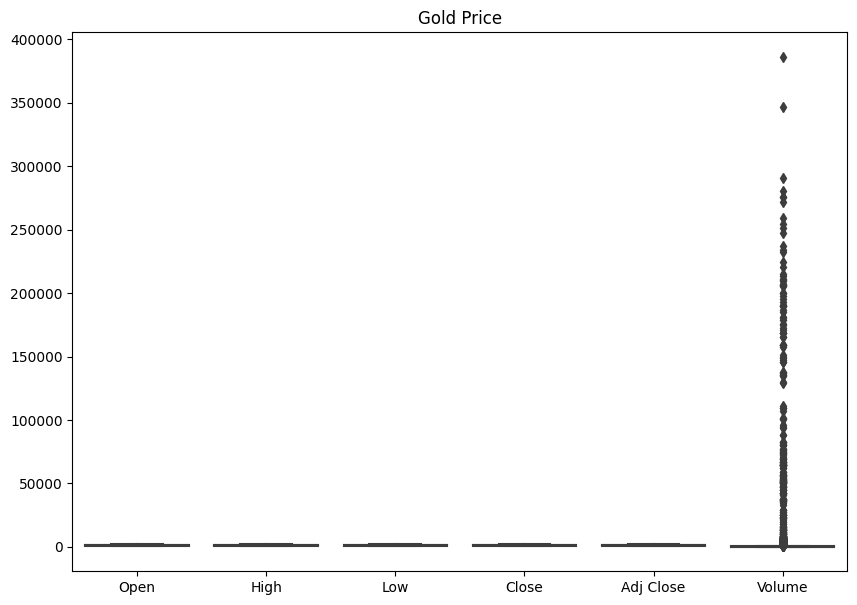

In [19]:
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64']
plt.subplots(figsize=(10,7))
sns.boxplot(data=df[numerical_col]).set_title("Gold Price")
plt.show()

__Mengatasi Missing value dengan IQR__

In [20]:


Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3-Q1
outliers = np.logical_or(df < (Q1 - 1.5 * IQR), df > (Q3 + 1.5 * IQR))
df = df[~outliers.any(axis=1)]


df.shape

C:\Users\Ahmad Irvan Maulana\AppData\Local\Temp\ipykernel_3832\3416974833.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = np.logical_or(df < (Q1 - 1.5 * IQR), df > (Q3 + 1.5 * IQR))


(4500, 7)

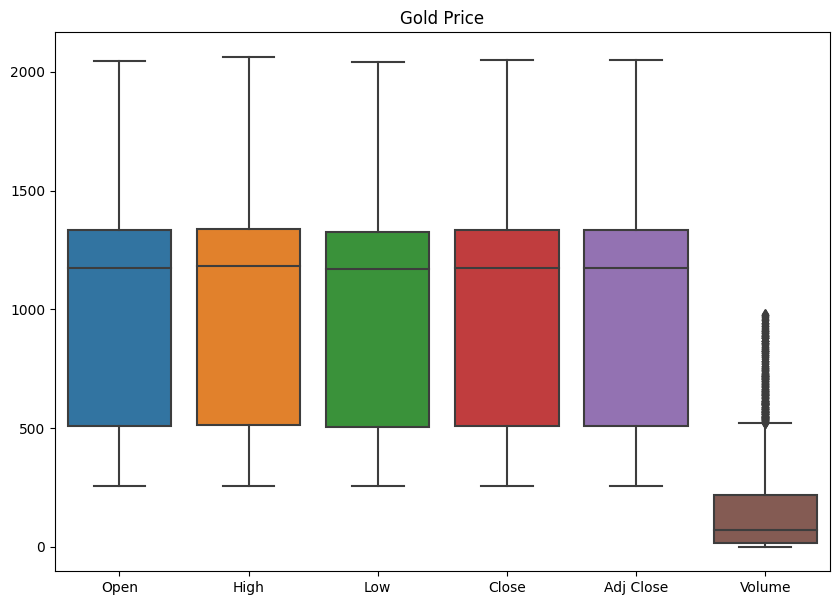

In [21]:
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64']
plt.subplots(figsize=(10,7))
sns.boxplot(data=df[numerical_col]).set_title("Gold Price")
plt.show()

__Exploratory Data Analysis__

__Univariate Analysis__

Fitur yang diprediksi pada kasus ini adalah terfokus pada 'Adj Close'

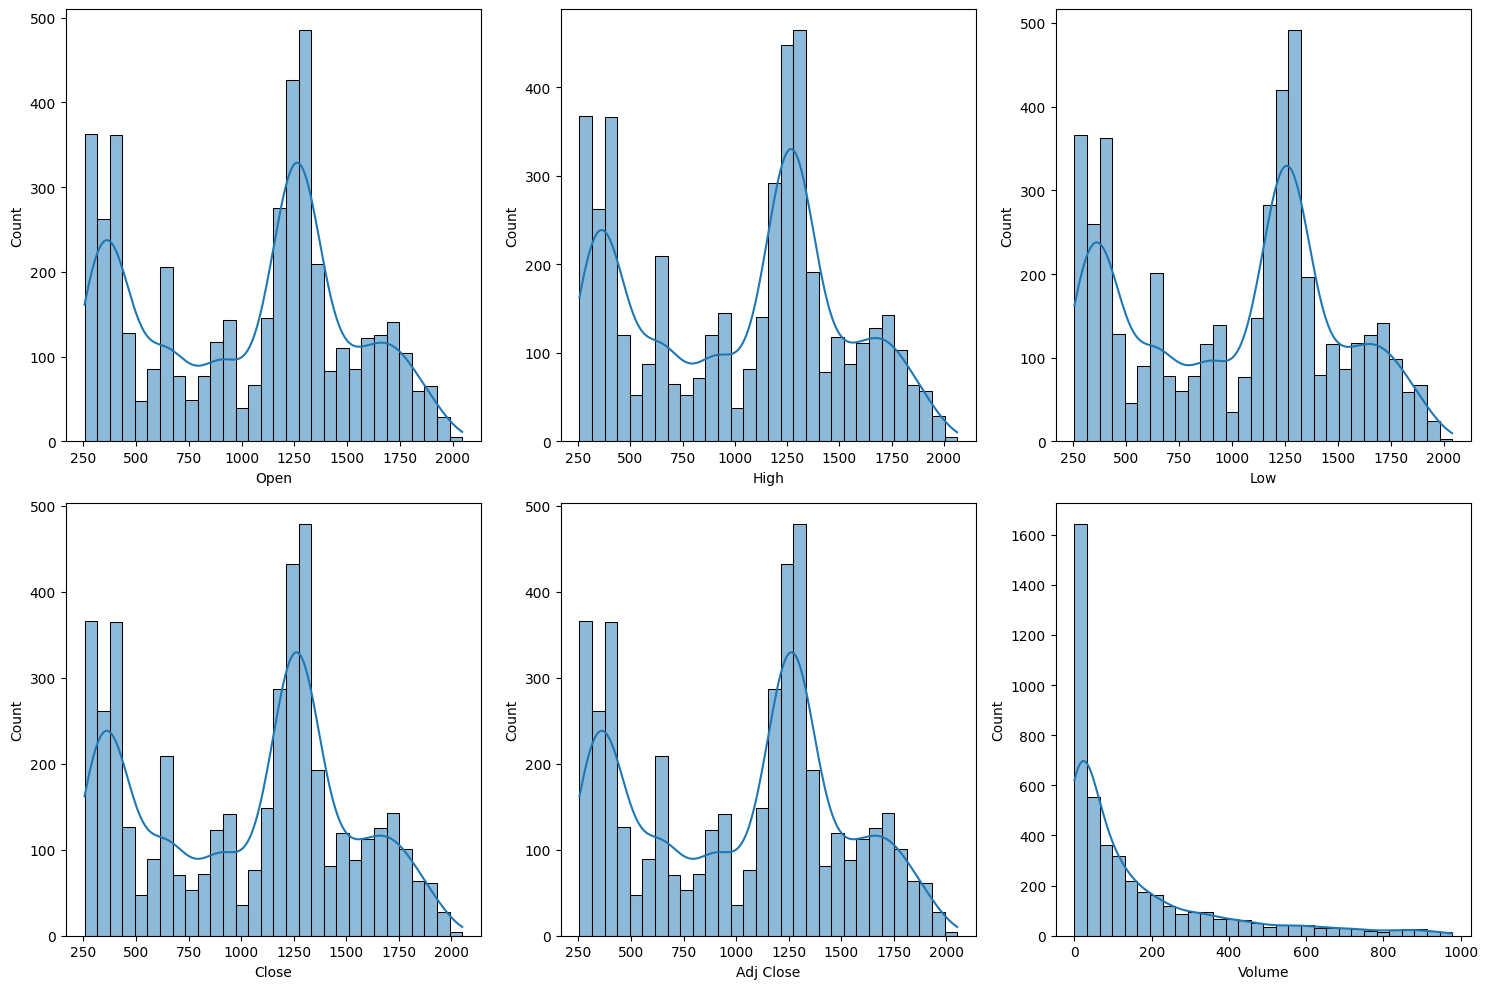

In [22]:
cols = 3
rows = 2
fig = plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col):
  ax = fig.add_subplot(rows, cols, i + 1)
  sns.histplot(x=df[col], bins=30, kde=True, ax=ax)
fig.tight_layout()
plt.show()

**Multivariate Analysis**

Selanjutnya kita akan menganalisis korelasi fitur "Adj Close" terhadap fitur lain seperti "Open", "High", "Low", "Close" dan "Volume". Dapat disimpulkan bahwa "Adj Close" memiliki korelasi positif yang kuat terhadap "Open", "High", "Low" dan "Close", sedangkan untuk fitur "Volume" memiliki korelasi sedang terhadap fitur "Adj Close"

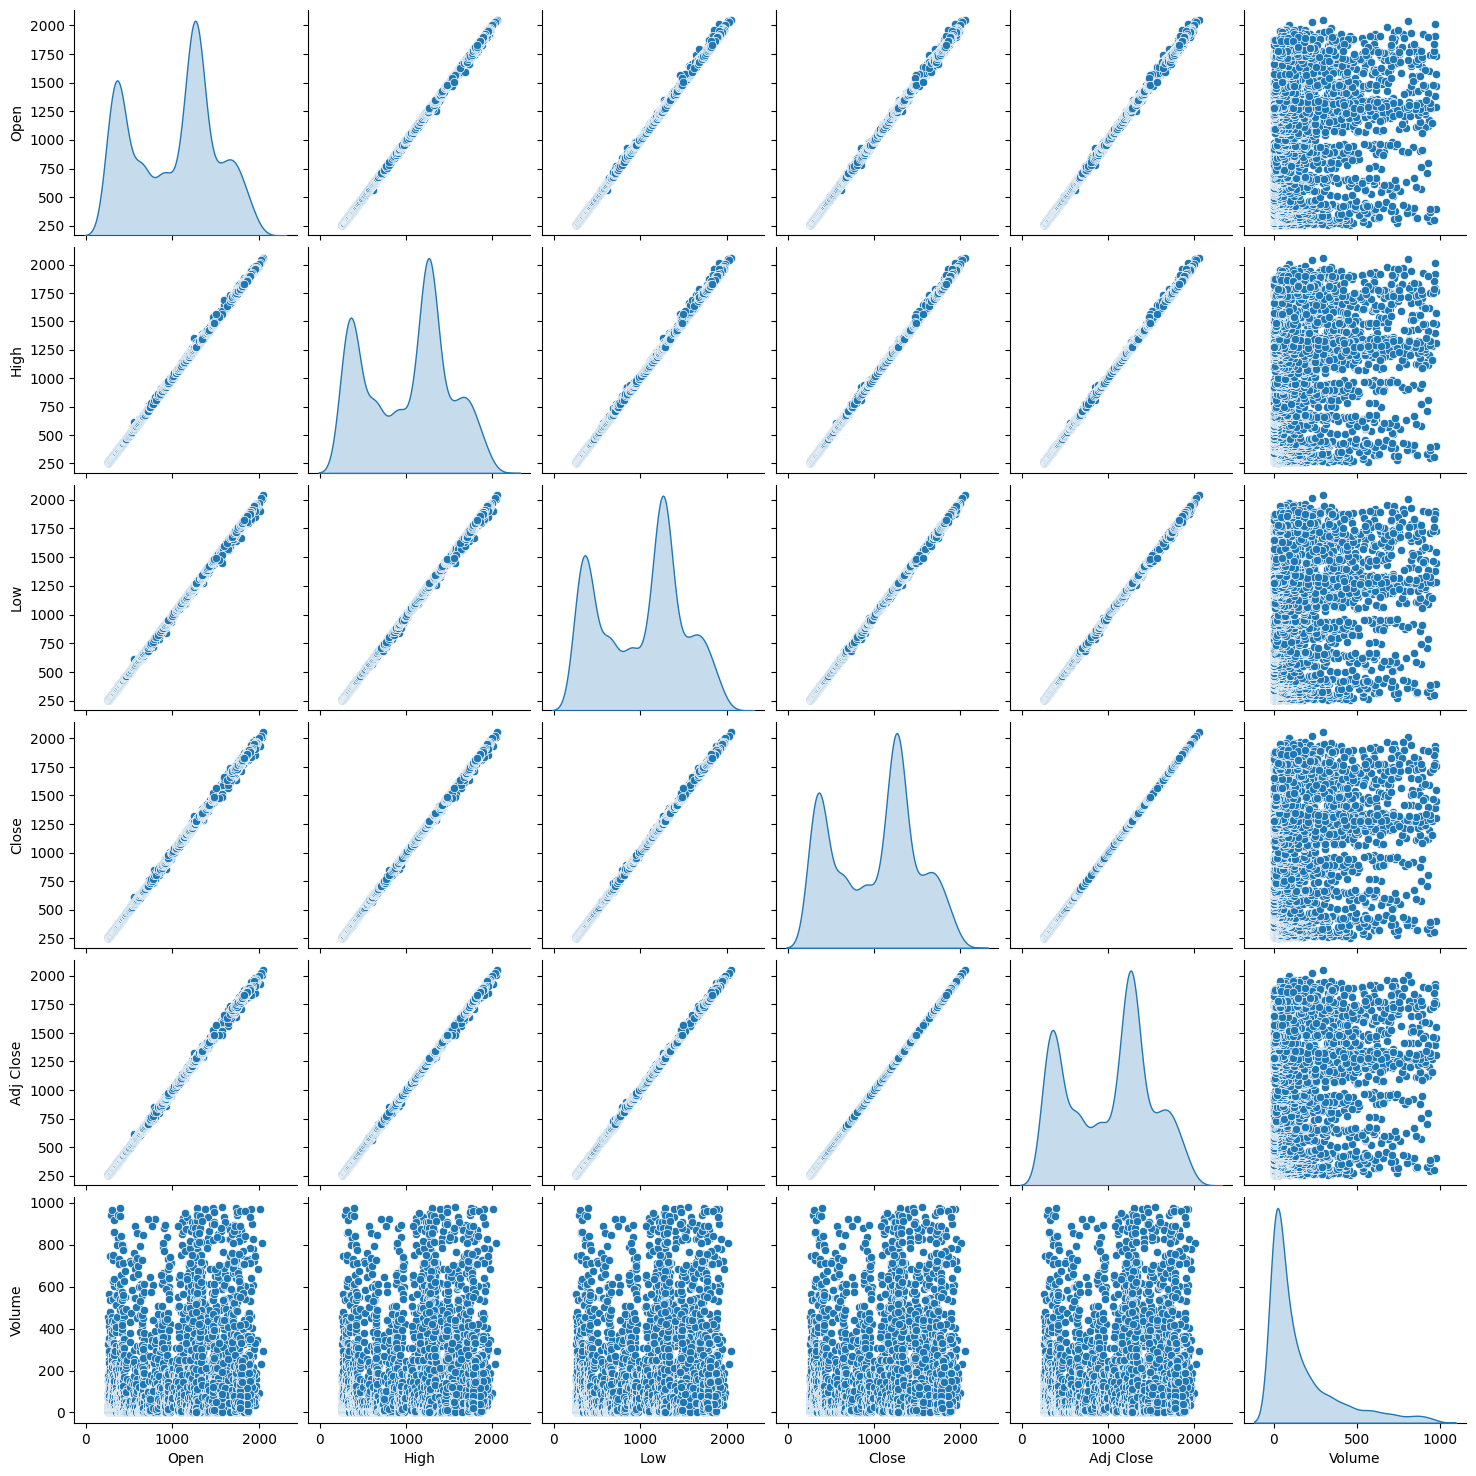

In [23]:
sns.pairplot(df[numerical_col], diag_kind='kde')
plt.show()

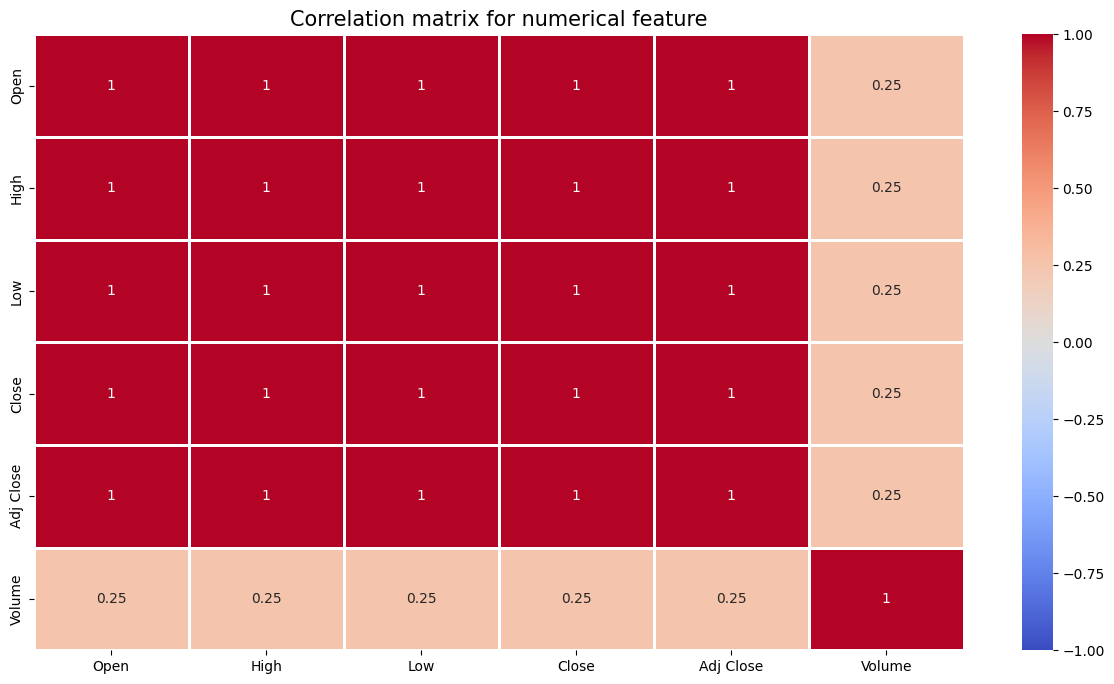

In [24]:
plt.figure(figsize=(15,8))
corr = df[numerical_col].corr().round(2)
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidth=1)
plt.title('Correlation matrix for numerical feature', size=15)
plt.show()

__menghapus kolom yang tidak ada korelasi dan sedikit pengaruh__

In [25]:
df = df.drop(['Date','Volume', 'Close'], axis=1)
df.head()


,Open,High,Low,Adj Close
0,268.399994,268.399994,268.399994,268.399994
1,268.000000,268.000000,268.000000,268.000000
2,267.299988,267.299988,267.299988,267.299988
3,268.000000,268.000000,268.000000,268.000000
4,268.000000,268.000000,268.000000,268.000000


# Data Preparation

**Splitting Dataset**

In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [28]:
print(len(X_train), 'records')
print(len(y_train), 'records')
print(len(X_test), 'records')
print(len(y_test), 'records')

3600 records
3600 records
900 records
900 records


**Data Normalization**

Untuk melakukan normalisasi data kita akan menggunakan library MinMaxScaler. Fungsi normalisasi pada data agar model lebih cepat dalam mempelajari data karena data telah diubah pada rentang tertentu seperti antara 0 dan 1

In [29]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'], index=['SVR', 'KNN',])

# Membangun Model

**Modeling & memilih hyperparameter** 

Hyperparameter Tuning Hyperparameter tuning adalah salah satu teknik yang dilakukan akan model dapat berjalan dengan performa terbaik. Biasanya dalam hyperparameter tuning, hyperparameter akan ditentukan secara acak oleh teknisi. Namun jika tidak ingin mencoba coba hyperparameter mana yang terbaik, kita dapat menggunakan GridSearch. GridSearch merupakan sebuah teknik yang memungkinkan kita untuk menguji beberapa hyperparameter sekaligus pada sebuah model

In [31]:
def grid_search(model, hyperparameters):
  results = GridSearchCV(
      model,
      hyperparameters,
      cv=5,
      verbose=1,
      n_jobs=6
  )

  return results

In [32]:
svr = SVR()
hyperparameters = {
    'kernel': ['rbf'],
    'C': [0.001, 0.01, 0.1, 10, 100, 1000],
    'gamma': [0.3, 0.03, 0.003, 0.0003]
}

svr_search = grid_search(svr, hyperparameters)
svr_search.fit(X_train, y_train)
print(svr_search.best_params_)
print(svr_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 1000, 'gamma': 0.3, 'kernel': 'rbf'}
0.9999006216196191


In [33]:
knn = KNeighborsRegressor()
hyperparameters = {
    'n_neighbors': range(1, 10)
}

knn_search = grid_search(knn, hyperparameters)
knn_search.fit(X_train, y_train)
print(knn_search.best_params_)
print(knn_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_neighbors': 3}
0.9998586707866112


**Model Training**

In [34]:
svr = SVR(C=10, gamma=0.3, kernel='rbf')
svr.fit(X_train, y_train)

SVR(C=10, gamma=0.3)

In [35]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

# Evaluation

**Model Evaluation**

In [36]:
model_dict = {
    'SVR': svr,
    'KNN': knn,
}

for name, model in model_dict.items():
  models.loc[name, 'train_mse'] = mean_squared_error(y_train, model.predict(X_train))
  models.loc[name, 'test_mse'] = mean_squared_error(y_test, model.predict(X_test))

models.head()

,train_mse,test_mse
SVR,502.167892,494.312466
KNN,26.82872,40.799261


<Axes: >

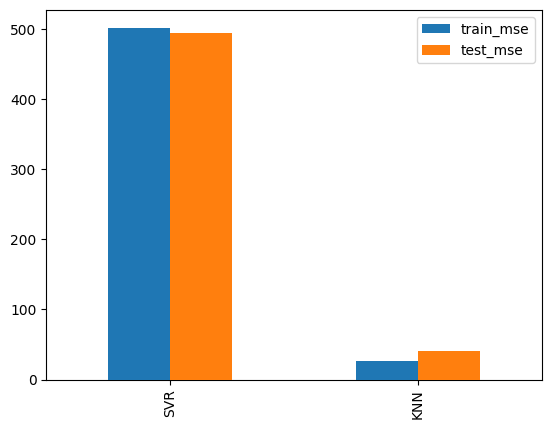

In [37]:
models.sort_values(by='test_mse', ascending=False).plot(kind='bar', zorder=3)

__melihat akurasi model__

In [38]:
svr_accuracy = svr.score(X_test, y_test)*100
knn_accuracy = knn.score(X_test, y_test)*100

In [39]:
list_evaluasi = [[svr_accuracy],
            [knn_accuracy]]
evaluasi = pd.DataFrame(list_evaluasi,
                        columns=['Accuracy (%)'],
                        index=['SVR','K-Nearest Neighbor'])
evaluasi

,Accuracy (%)
SVR,99.801776
K-Nearest Neighbor,99.983639


Dari hasil evaluasi di atas dapat memberikan informasi bahwa ketiga model yang dibangun memiliki performa di atas 90% hampir 100%. Dimana dapat dilihat juga bahwa model dengan algoritma KNN memiliki performa yang diukur dengan nilai akurasi yang lebih baik dari dua model lainnya yaitu model dengan algoritma SVR

# Membandingkan data sebenarnya dengan hasil prediksi

In [42]:
import pandas as pd

model_dict = {
    'SVR': svr,
    'KNN': knn,
}

X_test_df = pd.DataFrame(X_test) 
prediksi = X_test_df.iloc[:130].copy()


pred_dict = {'y_true': y_test[:130]}


for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
result_df = pd.DataFrame(pred_dict)


print(result_df)


          y_true  prediksi_SVR  prediksi_KNN
0    1509.900024        1509.1        1508.5
1    1299.900024        1305.3        1294.8
2    1299.599976        1305.6        1299.1
3    1304.500000        1311.7        1297.3
4     351.200012         360.6         346.6
..           ...           ...           ...
125  1474.000000        1481.5        1475.9
126  1798.199951        1754.8        1805.6
127  1377.800049        1386.0        1374.0
128  1212.800049        1215.5        1212.9
129  1640.599976        1629.5        1640.1

[130 rows x 3 columns]
